# Imports

In [223]:
# Reguläre Python Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklearn Imports, um den Datensatz in Trainings- und Testdaten zu splitten + KNN Algorithmus laden
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Import Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# Import Metriken für die Leistungsbewertung der Modelle
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Random State for reproducibility
RANDOM_STATE = 42

# Load Data

In [224]:
# Lade die Daten
df = pd.read_csv("./data/dataset_cleaned.csv")

In [225]:
# Zeige die ersten Zeilen des Datensatzes an
df.head()

,Customer_ID,CCreditScore,CGeography,CGender,CAge,CTenure,CBalance,CNumOfProducts,CHasCrCard,CIsActiveMember,...,Last_Login_Days_Ago,Support_Tickets_Count,Mobile_App_Usage_Hours,Onboarding_Month,Is_Holiday_Onboarding,Churn,Risk_Level,CLV_Continuous,season,Churn_Category
0,CUST_000001,553.295220,France,Male,39,2,131008.168572,1,1,0,...,1.094710,1,7.979899,8,0,0,Low_Risk,21696.256022,Summer,No Churn
1,CUST_000002,552.939394,France,Male,33,4,118529.788812,1,0,0,...,14.809607,0,11.565167,11,0,0,Low_Risk,15918.891128,Autumn,No Churn
2,CUST_000003,688.745934,Spain,Male,40,1,-879.724555,2,1,1,...,26.434273,0,3.331838,2,0,0,Medium_Risk,10361.315773,Winter,No Churn
3,CUST_000004,771.940664,France,Male,40,9,125563.132706,1,1,0,...,18.540471,2,12.714742,1,1,0,Low_Risk,15189.776245,Winter,No Churn
4,CUST_000005,484.092560,France,Male,55,5,95759.918567,1,0,1,...,11.893918,1,0.719512,2,0,0,Low_Risk,14631.814966,Winter,No Churn


In [226]:
# Zeigt Spalten in kompakter Form
df.columns

Index(['Customer_ID', 'CCreditScore', 'CGeography', 'CGender', 'CAge',
       'CTenure', 'CBalance', 'CNumOfProducts', 'CHasCrCard',
       'CIsActiveMember', 'CEstimatedSalary', 'Account_Age_Months',
       'Avg_Monthly_Transactions', 'Transaction_Variance',
       'Last_Login_Days_Ago', 'Support_Tickets_Count',
       'Mobile_App_Usage_Hours', 'Onboarding_Month', 'Is_Holiday_Onboarding',
       'Churn', 'Risk_Level', 'CLV_Continuous', 'season', 'Churn_Category'],
      dtype='object')

# Classification mit KNN

In [227]:
# Teile den Datensatz auf in: feature set and target label
feature_set = ['CCreditScore', 'CAge', 'CTenure', 'CBalance', 'CNumOfProducts', 'CHasCrCard', 'CIsActiveMember', 'CEstimatedSalary', 'Account_Age_Months', 'Avg_Monthly_Transactions', 'Transaction_Variance', 'Last_Login_Days_Ago', 'Support_Tickets_Count', 'Mobile_App_Usage_Hours', 'Onboarding_Month', 'Is_Holiday_Onboarding']
X = df[feature_set]
y = df['Churn']

### Split Dataset

In [228]:
# Splitte den Datensatz in Trainings- und Testdaten auf. (30% Testdaten)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y)

Im Folgenden ist eine Skalierung für den kNN notwendig, da das kNN-Verfahren auf Distanzberechnungen zwischen Datenpunkten basiert. D. h. wenn Features unterschiedliche Skalen haben, dominieren Features mit größeren Werten die Distanzberechnung. Beispielsweise haben wir Werte von 500, 600 oder mehr für CCreditScore. Hingegen gibt die Spalte CAge Werte zwischen 0 - 99 her und CBalance besitzt Werte im sechstelligen Bereich. Ohne Skalierung würde zum Beispiel CBalance (größte Werte) die Distanzberechnung dominieren, während das Alter CAge kaum Einfluss hätte. Der StandardScaler transformiert jedes Feature zu: 

    z = (x - μ) / σ 

- μ = Mittelwert des Features
- σ = Standardabweichung des Features
- Resultat: Alle Features haben Mittelwert=0 und Standardabweichung=1

In [229]:
from sklearn.preprocessing import StandardScaler
# scale the data
scaler = StandardScaler()
scaler.fit(X_train) #fit the Scaler only with training data, so that the test data does not influence the Scaler
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) #Test data is also scaled, but the Scaler is only fitted with the training data
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.147564,-0.285850,-1.044444,1.620960,-1.005393,0.636880,0.917601,-1.426230,-0.220732,-0.278522,-0.870573,-1.167129,-0.673216,-0.622370,0.151300,-0.457491
1,-0.668576,-0.088994,-1.735175,-0.189546,-1.005393,-1.570155,0.917601,-0.705432,1.421506,0.325907,-0.094954,0.592122,-0.673216,4.503164,1.598465,2.185837
2,-0.705256,-0.876420,-1.735175,-1.214548,-1.005393,0.636880,0.917601,-0.333382,-0.709266,-0.882952,-0.728602,0.613237,-0.673216,1.328963,1.598465,2.185837
3,0.603888,-0.088994,1.027747,-1.112795,2.770852,0.636880,-1.089798,-0.551571,0.832940,0.930336,-0.926062,-0.584120,-0.673216,0.742784,-1.585298,2.185837
4,0.284938,2.765427,1.027747,-1.155717,0.882730,0.636880,0.917601,-0.008005,-0.032986,0.023692,0.045004,-0.324695,0.631811,0.371262,1.598465,2.185837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5952,0.485102,0.009435,0.337017,0.940565,-1.005393,0.636880,0.917601,-1.721871,-0.835996,-1.487381,-0.154133,-0.987249,-0.673216,-0.023558,0.440733,-0.457491
5953,0.454703,-0.777992,-1.389809,-1.152673,0.882730,-1.570155,-1.089798,-1.843289,-0.697961,-0.278522,-0.360601,0.679037,-0.673216,1.122689,0.151300,-0.457491
5954,0.257414,-0.384278,-1.389809,-1.188524,0.882730,0.636880,-1.089798,1.177035,0.088171,-0.278522,-0.732263,-0.618792,-0.673216,-0.735827,0.151300,-0.457491
5955,-0.425596,0.206291,0.682382,0.871999,0.882730,0.636880,-1.089798,-1.600351,-0.979408,0.930336,-0.915039,0.055101,-0.673216,0.919506,-1.006432,-0.457491


### Berechne geeigneten n_neigbors

In [230]:
# Finde den besten Parameter für "n_neighbors" (oft auch "k" genannt)
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 20)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train_scaled, y_train)
    
    train_accuracies[neighbor] = knn.score(X_train_scaled, y_train)
    test_accuracies[neighbor] = knn.score(X_test_scaled, y_test)

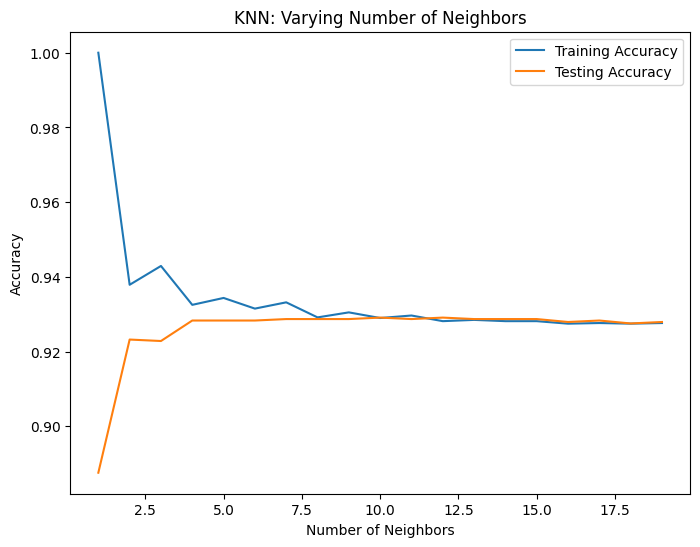

In [ ]:
# Figure out the best n_neigbors (best fit: k=7)
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

### Train KNN

In [232]:
# Create KNN model and fit the model to the training data
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test_scaled)

### Eveluate KNN

In [233]:
# Calculate model accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
# Calculate model precision
print("Precision:", precision_score(y_test, y_pred))
# Calculate model recall
print("Recall:", recall_score(y_test, y_pred))
# Calculate model f1 score
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.9287113200156678
Precision: 0.6923076923076923
Recall: 0.0481283422459893
F1-Score: 0.09


In [234]:
# Überprüfe die Klassenverteilung
print("Klassenverteilung im Trainingsset:")
print(y_train.value_counts())
print(f"Anteil Churn: {y_train.mean():.4f}")

print("\nKlassenverteilung im Testset:")
print(y_test.value_counts())
print(f"Anteil Churn: {y_test.mean():.4f}")

Klassenverteilung im Trainingsset:
Churn
0    5521
1     436
Name: count, dtype: int64
Anteil Churn: 0.0732

Klassenverteilung im Testset:
Churn
0    2366
1     187
Name: count, dtype: int64
Anteil Churn: 0.0732


#### Auswertung: Unbalancierter Datensatz

Die Accuracy von 92,87% zeigt auf den ersten Blick eine hohe Modellgenauigkeit. Allerdings ist der Datensatz stark unbalanciert (nur 7,3% Churn-Fälle). Ohne Standardisierung (siehe oben) würden bei der Auswertung der Metriken für Precision, Recall und F1-Score keine Werte ausgegeben werden.

**Accuracy (92,87%):** Bei nur 7,3% Churn-Fällen könnte das Modell einfach immer "Kein Churn" vorhersagen und hätte trotzdem ~92% Accuracy. Daher ist Accuracy bei unbalancierten Daten irreführend.

**Precision (69,23%):** Von allen als "Churn" vorhergesagten Kunden sind tatsächlich 69,23% Churn-Fälle. Das Modell macht also wenige Fehlalarme.

**Recall (4,81%):** Das Modell erkennt nur 4,81% aller tatsächlichen Churn-Kunden. Das bedeutet, dass 95,19% aller Churn-Kunden übersehen werden!

**F1-Score (0,09):** Der niedrige Recall zieht den F1-Score nach unten. Ein Wert von 0,09 ist sehr schlecht (Maximum wäre 1,0).

**Fazit:** Das KNN-Modell klassifiziert fast alle Kunden als "Kein Churn". Es findet nur sehr wenige Churn-Fälle (niedriger Recall), aber die gefundenen sind meist korrekt (hohe Precision). Für ein Unternehmen wäre dieses Modell problematisch, da 95% der kündigenden Kunden übersehen werden. Dies würde zu Kundenabwanderung, sinkenden Gewinnen und hohen Kosten durch verlorene Kunden führen.

# Classification mit Decision-Tree

In [235]:
# Create a Decision Tree classifier object
clf_tree = DecisionTreeClassifier(random_state=RANDOM_STATE, min_samples_leaf=0.04)

# Train the model using training dataset
clf_tree = clf_tree.fit(X_train, y_train)

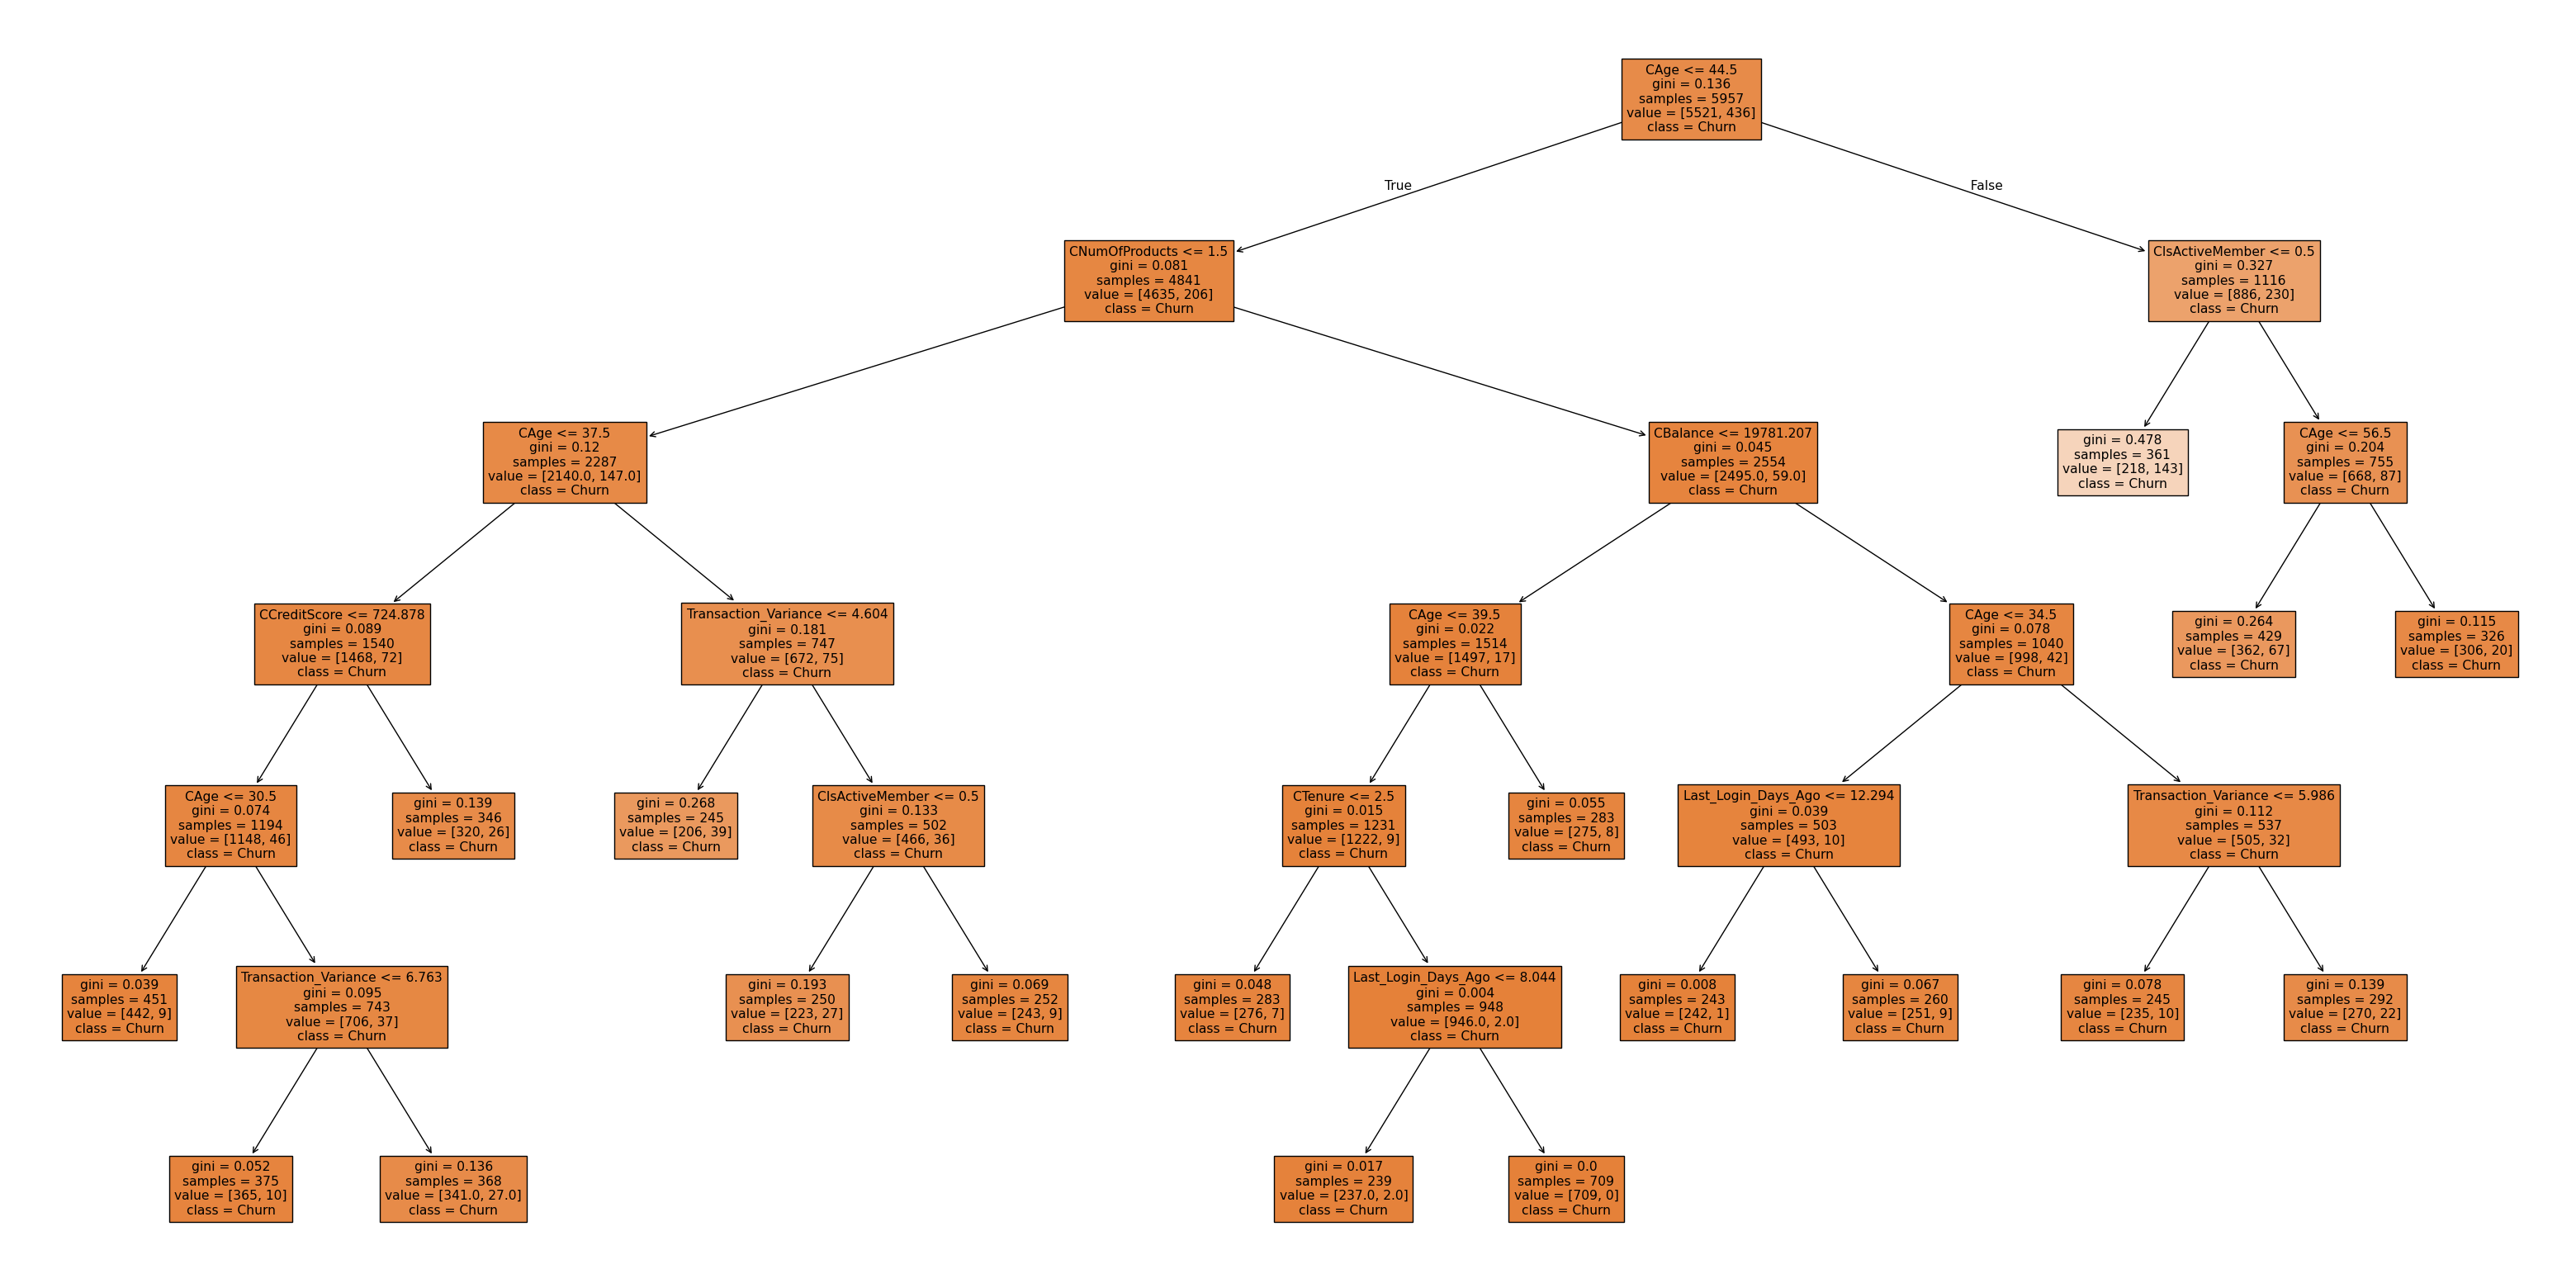

In [236]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(clf_tree, feature_names = X_train.columns, filled=True, class_names= ["Churn","No Churn"])
plt.show()